## CPSC 483-01 Project 7
***
**Name:** Tianzheng Li <br><br>
*All 8 experiments are functional and completed*

# 1. Reading the data
***
The csv file is read in as a dataframe.

In [1]:
import pandas as pd

# Read data
data = pd.read_csv('spending.csv')
display(data)

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
0,0,0,0,0,13,0,16,8,0,17
1,11,12,7,9,0,26,7,6,5,2
2,14,13,6,12,0,30,8,6,4,2
3,0,0,17,1,0,0,0,0,3,22
4,0,0,45,1,0,0,0,0,5,27
...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0
284,0,0,0,0,14,0,12,7,0,16
285,0,0,23,0,0,0,0,0,4,17
286,3,14,0,0,20,0,0,0,8,0


# 2. K-means clustering
***
There are `8` clusters for the data, as per the default.

In [2]:
from sklearn.cluster import KMeans
import numpy as np

# K-means clustering
data2 = pd.read_csv('spending.csv')
kmeans = KMeans().fit(data2)
data2['cluster'] = kmeans.labels_

# Number of clusters
print("# of clusters: " + str(len(kmeans.cluster_centers_)))
display(data2)

# of clusters: 8


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak,cluster
0,0,0,0,0,13,0,16,8,0,17,5
1,11,12,7,9,0,26,7,6,5,2,0
2,14,13,6,12,0,30,8,6,4,2,0
3,0,0,17,1,0,0,0,0,3,22,6
4,0,0,45,1,0,0,0,0,5,27,2
...,...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0,3
284,0,0,0,0,14,0,12,7,0,16,5
285,0,0,23,0,0,0,0,0,4,17,4
286,3,14,0,0,20,0,0,0,8,0,3


# 3. Group by clusters
***
After grouping the data by the cluster assignment we can see that the mean and maximum spent are generally varied across all the grocery items.  The clusters seemed to be split by groups of people that generally only spend on a few certain items.

In [3]:
# Grouped by cluster assignment
data_g = data2.groupby(['cluster']).mean()
display(data_g)

print("Mean\n==============")
print(data_g.mean())

print("\nMinimum\n==============")
print(data_g.min())

print("\nMaximum\n==============")
print(data_g.max())

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
cluster,,,,,,,,,,
0,12.107143,10.357143,8.071429,11.785714,0.000000,25.928571,6.464286,7.571429,4.071429,2.642857
1,0.000000,0.000000,0.000000,0.000000,11.769231,0.000000,14.692308,4.519231,0.000000,23.711538
2,0.000000,0.000000,38.769231,2.730769,0.000000,0.000000,0.000000,0.000000,4.384615,30.269231
3,7.064516,7.435484,0.000000,0.000000,14.661290,0.000000,0.000000,0.000000,9.532258,0.000000
4,0.000000,0.000000,27.571429,2.571429,0.000000,0.000000,0.000000,0.000000,4.742857,29.028571
5,0.000000,0.000000,0.000000,0.000000,10.361702,0.000000,14.276596,4.106383,0.000000,16.063830
6,0.000000,0.000000,13.000000,1.857143,0.000000,0.000000,0.000000,0.000000,3.785714,27.214286
7,10.875000,9.416667,7.458333,13.416667,0.000000,33.791667,7.666667,7.750000,4.125000,2.791667


Mean
apples       3.755832
bananas      3.401162
beer        11.858803
bread        4.045215
broccoli     4.599028
diapers      7.465030
eggs         5.387482
milk         2.993380
potatoes     3.830234
steak       16.465247
dtype: float64

Minimum
apples      0.0
bananas     0.0
beer        0.0
bread       0.0
broccoli    0.0
diapers     0.0
eggs        0.0
milk        0.0
potatoes    0.0
steak       0.0
dtype: float64

Maximum
apples      12.107143
bananas     10.357143
beer        38.769231
bread       13.416667
broccoli    14.661290
diapers     33.791667
eggs        14.692308
milk         7.750000
potatoes     9.532258
steak       30.269231
dtype: float64


# 4. Dendrograms
***
From my observation there seems to be 4 clusters in 3 of the dendrograms and 5 clusters in 1 of them so I will stick with 4 clusters.

In [4]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

data = pd.read_csv('spending.csv')

Single


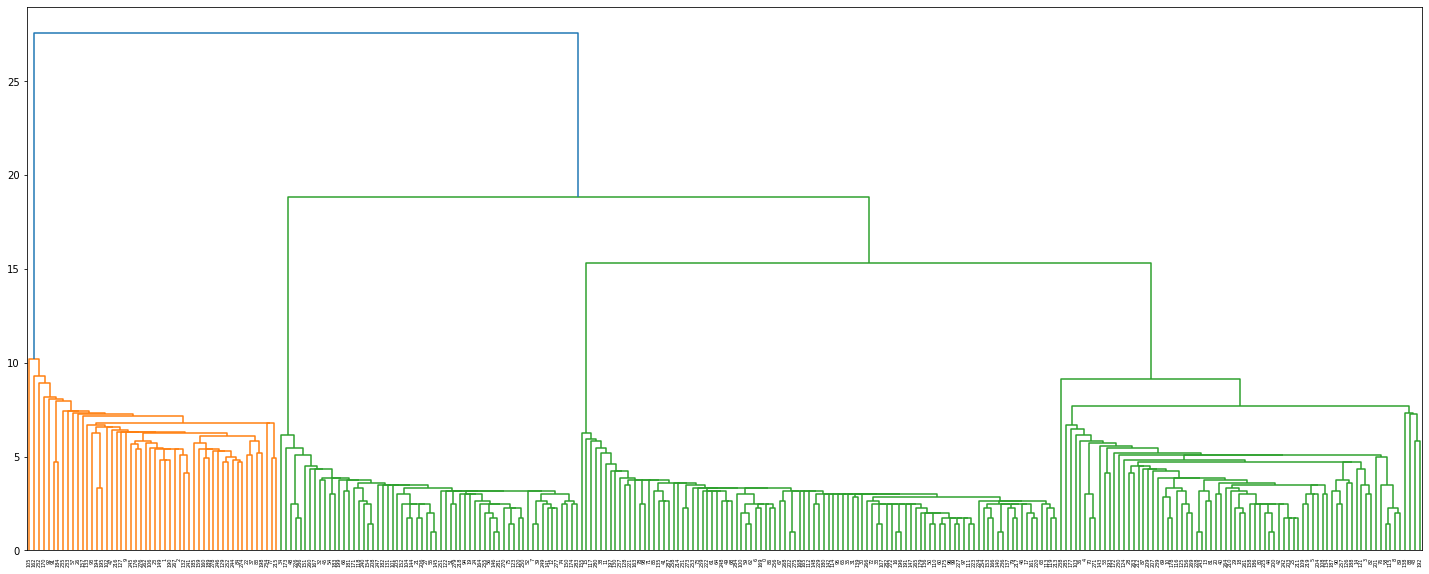

In [5]:
print('Single')
data_h = hierarchy.linkage(data, 'single')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(data_h)

Complete


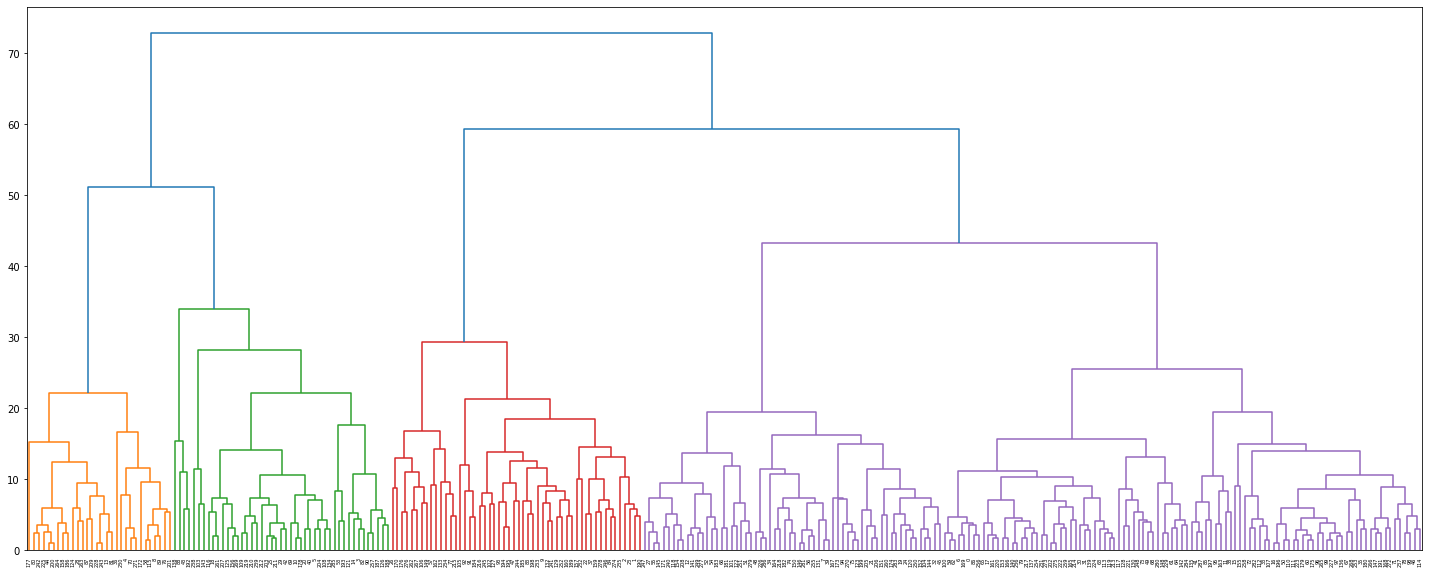

In [6]:
print('Complete')
data_h = hierarchy.linkage(data, 'complete')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(data_h)

Average


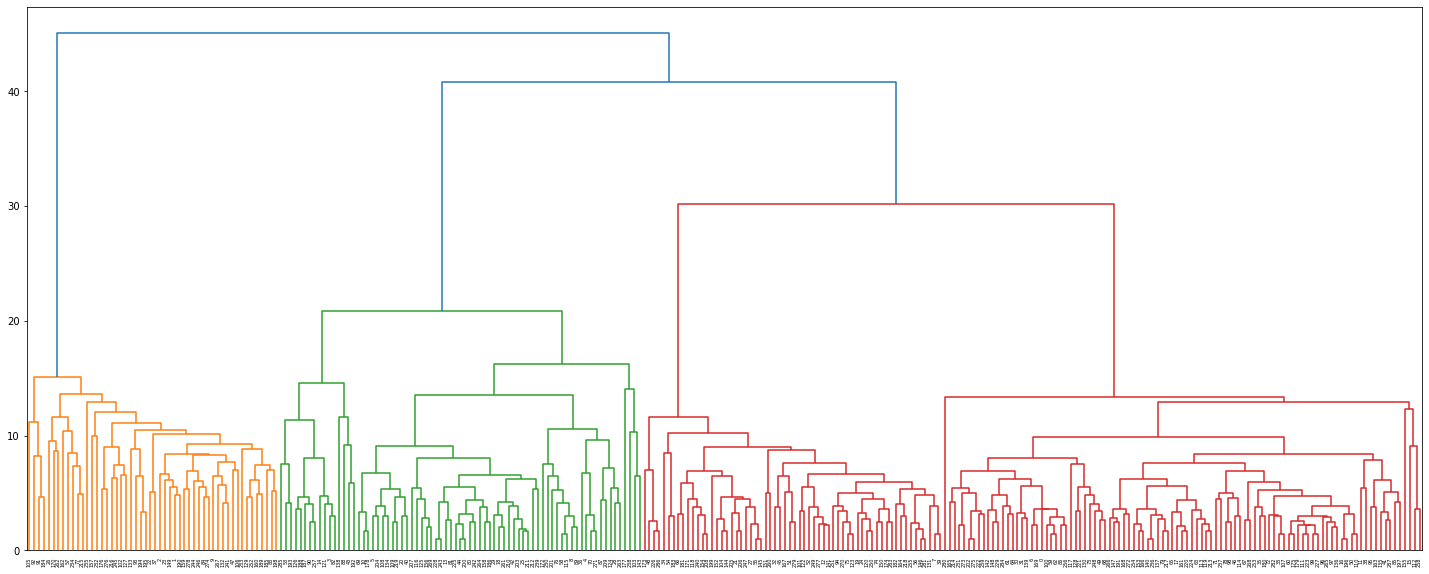

In [7]:
print('Average')
data_h = hierarchy.linkage(data, 'average')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(data_h)

Centroid


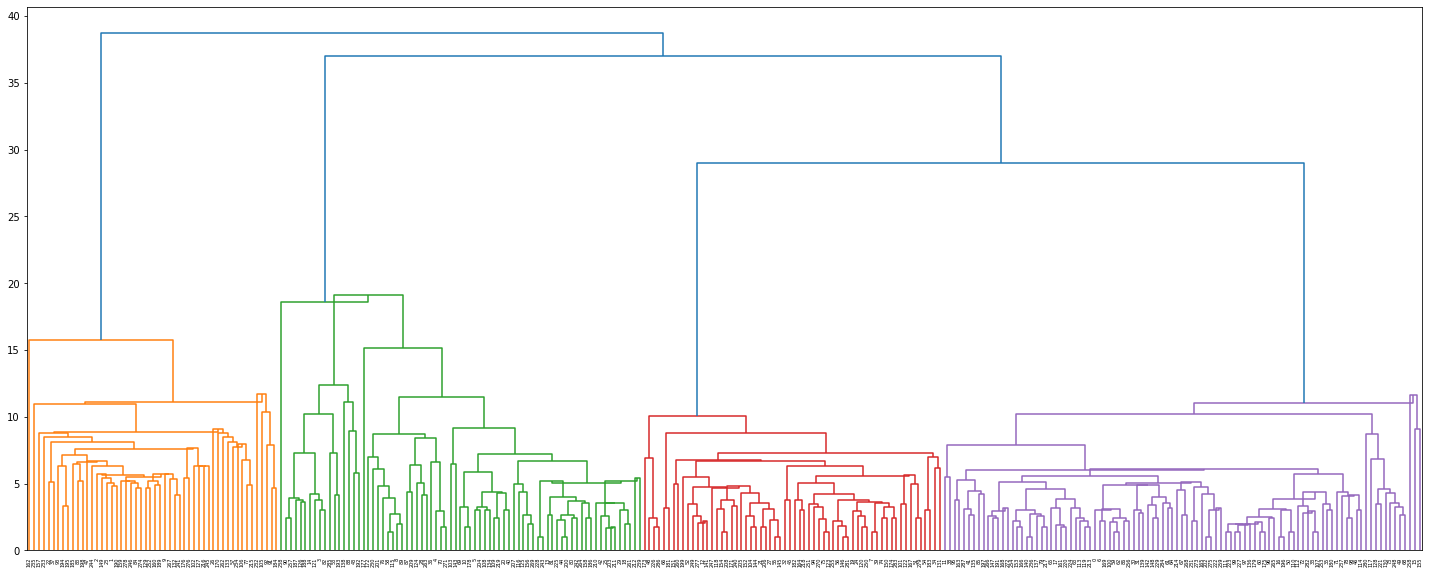

In [8]:
print('Centroid')
data_h = hierarchy.linkage(data, 'centroid')
fig = plt.figure(figsize=(25, 10))
dn = hierarchy.dendrogram(data_h)

# 5. K-means clustering with new clusters
***


In [9]:
# K-means clustering
data3 = pd.read_csv('spending.csv')
kmeans2 = KMeans(n_clusters = 4).fit(data3)
data3['cluster'] = kmeans2.labels_

# Number of clusters
print("# of clusters: " + str(len(kmeans2.cluster_centers_)))
display(data3)

# of clusters: 4


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak,cluster
0,0,0,0,0,13,0,16,8,0,17,1
1,11,12,7,9,0,26,7,6,5,2,3
2,14,13,6,12,0,30,8,6,4,2,3
3,0,0,17,1,0,0,0,0,3,22,2
4,0,0,45,1,0,0,0,0,5,27,2
...,...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0,0
284,0,0,0,0,14,0,12,7,0,16,1
285,0,0,23,0,0,0,0,0,4,17,2
286,3,14,0,0,20,0,0,0,8,0,0


# 6. Agglomerative Clustering
***
Comparing the agglomerative cluster assignment with the k-means cluster assignment (both with 4 clusters) the overall difference is relatively small. The groupings of 0 and 1 as well as 3 and 4 seemed to be swapped.

In [10]:
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering
data4 = pd.read_csv('spending.csv')
agglo = AgglomerativeClustering(n_clusters = 4).fit(data4)
data4['cluster'] = agglo.labels_ 

# Number of clusters
print("# of clusters: 4")
display(data4)

# of clusters: 4


,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak,cluster
0,0,0,0,0,13,0,16,8,0,17,1
1,11,12,7,9,0,26,7,6,5,2,2
2,14,13,6,12,0,30,8,6,4,2,2
3,0,0,17,1,0,0,0,0,3,22,0
4,0,0,45,1,0,0,0,0,5,27,0
...,...,...,...,...,...,...,...,...,...,...,...
283,8,10,0,0,16,0,0,0,8,0,3
284,0,0,0,0,14,0,12,7,0,16,1
285,0,0,23,0,0,0,0,0,4,17,0
286,3,14,0,0,20,0,0,0,8,0,3


In [11]:
# K-means Clustering
print("K-means Clustering")
kmeans_clusters = [0, 0, 0, 0]
for i in kmeans2.labels_:
    kmeans_clusters[i] += 1
display(kmeans_clusters)

# Agglomerative Clustering
print("Agglomerative Clustering")
agglo_clusters = [0, 0, 0, 0]
for i in agglo.labels_:
    agglo_clusters[i] += 1
display(agglo_clusters)

K-means Clustering


[62, 101, 73, 52]

Agglomerative Clustering


[75, 99, 52, 62]

# 7. Group by clusters
***
It seems like the cluster that tends to buy almost everything includes buying diapers so I can assume that people who would have to take care of children would have more varied spending habits [`2`], whereas there is a cluster of people that only buy beer and the bare minimum of macronutrients [`1`]. The other two clusters seem to be just the average adult [`0`] and the vegetarian [`3`].

In [12]:
# Grouped by cluster assignment
data_g2 = data3.groupby(['cluster']).mean()
display(data_g2)

print("Mean\n==============")
print(data_g2.mean())

print("\nMinimum\n==============")
print(data_g2.min())

print("\nMaximum\n==============")
print(data_g2.max())

,apples,bananas,beer,bread,broccoli,diapers,eggs,milk,potatoes,steak
cluster,,,,,,,,,,
0,7.064516,7.435484,0.000000,0.000000,14.661290,0.000000,0.000000,0.000000,9.532258,0.000000
1,0.000000,0.000000,0.059406,0.039604,10.881188,0.000000,14.207921,4.237624,0.069307,20.138614
2,0.000000,0.000000,29.438356,2.506849,0.000000,0.000000,0.000000,0.000000,4.465753,29.287671
3,11.538462,9.923077,7.788462,12.538462,0.000000,29.557692,7.019231,7.653846,4.096154,2.711538


Mean
apples       4.650744
bananas      4.339640
beer         9.321556
bread        3.771229
broccoli     6.385620
diapers      7.389423
eggs         5.306788
milk         2.972867
potatoes     4.540868
steak       13.034456
dtype: float64

Minimum
apples      0.000000
bananas     0.000000
beer        0.000000
bread       0.000000
broccoli    0.000000
diapers     0.000000
eggs        0.000000
milk        0.000000
potatoes    0.069307
steak       0.000000
dtype: float64

Maximum
apples      11.538462
bananas      9.923077
beer        29.438356
bread       12.538462
broccoli    14.661290
diapers     29.557692
eggs        14.207921
milk         7.653846
potatoes     9.532258
steak       29.287671
dtype: float64


# 8. Conclusion
***
0. As the more general group they seem to buy anything that aren't fruits. <br>
1. This cluster seems to spend the most on beer and steak. They would most likely purchase more alcohol and other types of meat while avoiding fruits and vegetables. <br>
2. As another more general group that is also the only group that spends on diapers, ie. parents, the only item they seem to avoid is brocolli. For young kids they may purchase anything but greens, as they seem to be difficult to get them to eat. <br>
3. This cluster is the one that purchases only fruits and vegetables. They may be vegetarians or people on diets so they would not purchase meat or junk food.